In [27]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
sns.set()
%matplotlib inline

In [4]:
#s数据为学习时间与是否合格
exam_data=pd.read_csv('exam_data.csv')

<AxesSubplot:xlabel='hours', ylabel='result'>

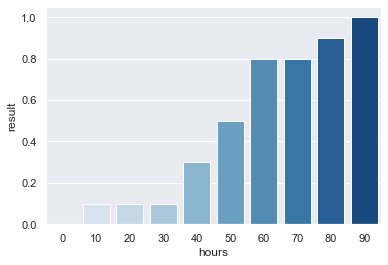

In [5]:
#纵轴为平均值
sns.barplot(x='hours',y='result',data=exam_data,ci=None,palette='Blues')

### 使用statsmodels进行逻辑回归

In [7]:
#构建模型
logistic_model=smf.glm(formula='result~hours',
                      data=exam_data,
                      family=sm.families.Binomial(link=sm.genmod.families.links.logit()))

In [8]:
logistic_result=logistic_model.fit()

##### glm参数说明：
formula："目的变数~说明变数"
data：指定数据，类型为pandas的dataframe
family：指定分布函数和link函数

※分布関数に二項分布（Binomial）を指定すればロジスティック回帰になる。
※Binomialを指定すると自動でリンク関数をlogitとしてモデルが作られるが、ここではあえて明示的にリンク関数を指定した。

In [9]:
#输出结果
logistic_result.summary()

result = 0.0823*hours - 4.0448

result： 0.5~1  pass
result:  0~0.5  failed

    
    
正规化

不用正规化的场景：
1.模型是随机森林（随机森林只看大还是小，不看具体数值，所以无需正规化）
2.特征只有1个。
3.特征的取值范围相近。





y=x1+x2+x3...

x1 收入（200000~300000）
x2  年龄（20~70）
x3  家庭人数（2~5）

y 消费



y=x1

x1 学习时间(3~5)
y 考试结果



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37.509
Date:                Tue, 10 May 2022   Deviance:                       75.018
Time:                        22:20:31   Pearson chi2:                     98.3
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0448      0.795     -5.086      0.000      -5.604      -2.486
hours          0.0823      0.015      5.405      0.000       0.052       0.112
==============================================================================
"""

上方记载着回归系数

In [12]:
#生成1-90的10间隔的test_data
test_data=pd.DataFrame({
    'hours':np.arange(0,100,10)
})

In [14]:
#预测合格率
pred=logistic_result.predict(test_data)
pred

0    0.017212
1    0.038364
2    0.083305
3    0.171504
4    0.320440
5    0.517868
6    0.709871
7    0.847873
8    0.926985
9    0.966577
dtype: float64

### 使用sklearn进行logistic回归

In [15]:
test_result=pd.read_csv('exam_data.csv')

In [17]:
hours=test_result['hours']
result=test_result['result']

In [1]:
# 特征值过少，只有一个hours，因此改变数组形状，从而能够让训练数据输入到模型里。
# （逻辑回归模型默认只能接受二维或多维数组。）
X_train=hours.values.reshape(-1,1)

NameError: name 'hours' is not defined

In [22]:
Y_train = result.values

In [29]:
lr = LogisticRegression() 

In [30]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [31]:
# 結果
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[0.08230644]]
intercept =  [-4.04384494]


In [32]:
# 予測
test_data =  np.arange(0, 100, 10)
X_test = test_data.reshape(-1,1)

In [33]:
probs = lr.predict_proba(X_test)
print(probs)

[[0.98277206 0.01722794]
 [0.96160884 0.03839116]
 [0.91665299 0.08334701]
 [0.82844575 0.17155425]
 [0.6795245  0.3204755 ]
 [0.48213838 0.51786162]
 [0.29017356 0.70982644]
 [0.15217983 0.84782017]
 [0.07305579 0.92694421]
 [0.03344828 0.96655172]]
